In [1]:
import numpy as np
import matplotlib.pyplot as plt

[None]

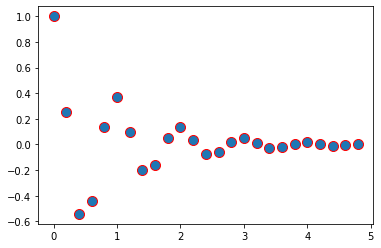

In [5]:
# 拉弧测试
def f(t):
    'A damped exponertial'
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1*e1
t1 = np.arange(0,5,.2)
l = plt.plot(t1,f(t1),'ro')
plt.setp(l,markersize=10)
plt.setp(l,markerfacecolor='C0')

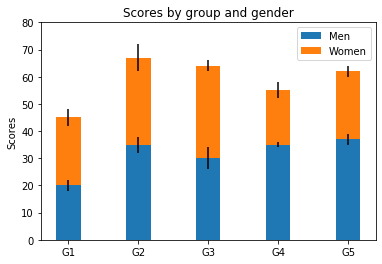

In [6]:
# 堆积条形图
N = 5
menMeans = (20,35,30,35,37)
womenMeans = (25,32,34,20,25)
menStd = (2,3,4,1,2)
womenStd = (3,5,2,3,2)
ind = np.arange(N)
width = 0.35

# yerr:误差线
p1 = plt.bar(ind,menMeans,width,yerr=menStd)
p2 = plt.bar(ind,womenMeans,width,
             bottom=menMeans,yerr=womenStd)
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind,('G1','G2','G3','G4','G5'))
plt.yticks(np.arange(0,81,10))
plt.legend((p1[0],p2[0]),('Men','Women'))

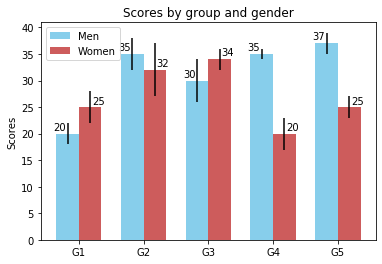

In [7]:
# 条形图
fig,ax = plt.subplots()
rects1 = ax.bar(ind-width/2,menMeans,width,yerr=menStd,
                color='SkyBlue',label='Men')
rects2 = ax.bar(ind+width/2,womenMeans,width,yerr=womenStd,
                color='IndianRed',label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1','G2','G3','G4','G5'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

Text(0.5, 1.0, 'How fast do you want to go today')

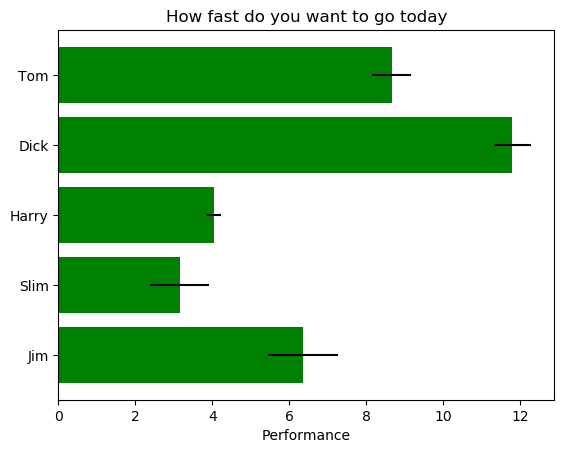

In [8]:
# 水平条形图

# 恢复 rc 的默认设置
plt.rcdefaults()

fig,ax = plt.subplots()

# Example data
people = ('Tom','Dick','Harry','Slim','Jim')
y_pos = np.arange(len(people))
performance = 3 + 10*np.random.rand(len(people))
error = np.random.rand(len(people))

ax1 = ax.barh(y_pos,performance,xerr=error,align='center',
        color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()   # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today')

Text(0.8, 0.9, 'race interrupted')

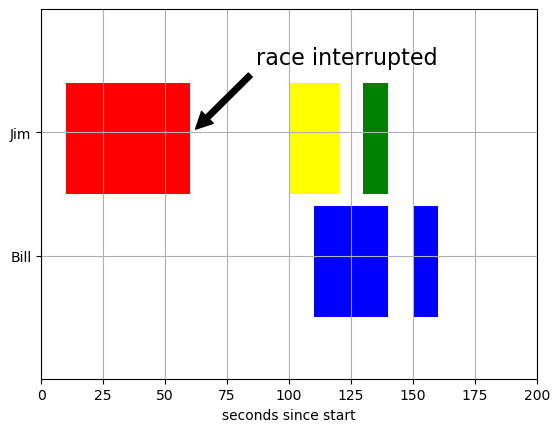

In [19]:
fig,ax = plt.subplots()
ax.broken_barh([(110,30),(150,10)],(10,9),facecolors='blue')
ax.broken_barh([(10,50),(100,20),(130,10)],(20,9),
               facecolors=('red','yellow','green'))
ax.set_ylim(5,35)
ax.set_xlim(0,200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15,25])
ax.set_yticklabels(['Bill','Jim'])
ax.grid(True)
# textcoords?
ax.annotate('race interrupted',xy=(61,25),xytext=(0.8,0.9),textcoords='axes fraction',
            arrowprops=dict(facecolor='black',shrink=0.05),fontsize=16,
            horizontalalignment='right',verticalalignment='top')

<Figure size 900x300 with 0 Axes>

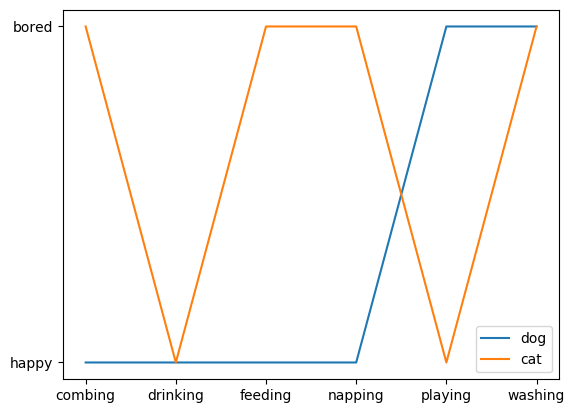

In [35]:
data = {'apple':10,'oranges':15,'lemons':5,'limes':20}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names,values)
axs[1].scatter(names,values)
axs[2].plot(names,values)
fig.suptitle('Categorical Plotting')

plt.clf()
cat = ['bored','happy','bored','bored','happy','bored']
dog = ['happy','happy','happy','happy','bored','bored']
activity = ['combing','drinking','feeding','napping','playing','washing']
fig,ax = plt.subplots()
ax.plot(activity,dog,label='dog')
ax.plot(activity,cat,label='cat')
ax.legend()

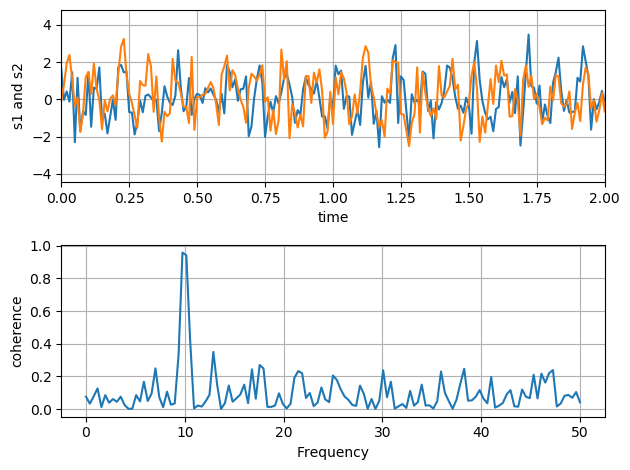

In [45]:
# 绘制两个信号的相干性
np.random.seed(1)
dt = 0.01
t = np.arange(0,30,dt)
nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))

s1 = np.sin(2*np.pi*10*t) + nse1
s2 = np.sin(2*np.pi*10*t) + nse2

fig,axs = plt.subplots(2,1)
axs[0].plot(t,s1,t,s2)
axs[0].set_xlim(0,2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

# Plot the coherence between x and y.
cxy,f = axs[1].cohere(s1, s2, 256, 1./dt)
axs[1].set_ylabel('coherence')
fig.tight_layout()

Text(0, 0.5, 'CSD(db')

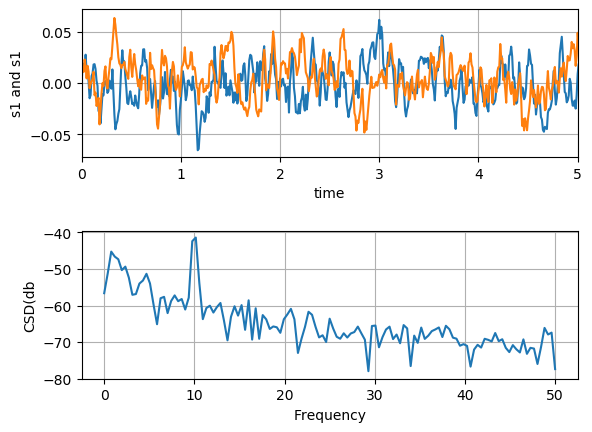

In [47]:
fig ,(ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)

np.random.seed(2)
r = np.exp(-t/0.05)

# 这是numpy函数中的卷积函数库
# a:(N,)输入的一维数组
# b:(M,)输入的第二个一维数组
# mode:{‘full’, ‘valid’, ‘same’}参数可选
# ‘full’　默认值，返回每一个卷积值，长度是N+M-1,在卷积的边缘处，信号不重叠，存在边际效应。
# ‘same’　返回的数组长度为max(M, N),边际效应依旧存在。
# ‘valid’ 　返回的数组长度为max(M,N)-min(M,N)+1,此时返回的是完全重叠的点。边缘的点无效。

cnse1 = np.convolve(nse1,r,mode='same') * dt
cnse2 = np.convolve(nse2,r,mode='same') * dt

s1 = 0.01*np.sin(2*np.pi*10*t)  + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t)  + cnse2

ax1.plot(t,s1,t,s2)
ax1.set_xlim(0,5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s1')
ax1.grid(True)

cxy,f = ax2.csd(s1,s2,256,1.0/dt)
ax2.set_ylabel('CSD(db')

In [ ]:
# 绘制限制型误差条形图
fig = plt.figure(0)
x = np.arange(10)
y = np.sin(np.arange(10)/20*np.pi)

plt.errorbar(x,y,yerr=0.1)

y = np.sin(np.arange(10)/20*np.pi) + 1
plt.errorbar(x,y,yerr=0.1,uplims=True)


y = np.sin(np.arange(10.0) / 20.0 * np.pi) + 2
upperlimits = np.array([1,0]*5)
lowerlimits = np.array([0,1]*5)
plt.errorbar(x,y,yerr=0.1,uplims=upperlimits,lolims=lowerlimits)

plt.xlim(-1,10)

fig = plt.figure(1)
x = np.arange(10.0)/10
y = (x + 0.1)**2
plt.errorbar(x,y,xerr=0.1,xlolims=True)

y = (x + 0.1)**3
plt.errorbar(x+0.6,y,xerr=0.1,xuplims=upperlimits,xlolims=lowerlimits)

y = (x + 0.1)**4
plt.errorbar(x+1.2,y,xerr=0.1,xuplims=True)


<ErrorbarContainer object of 3 artists>

Text(0.5, 0.98, 'Error subsampling for better appearance')

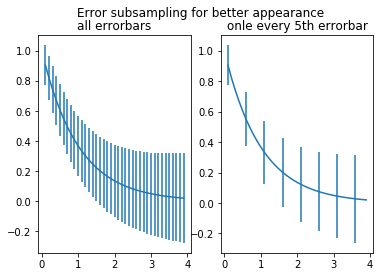

In [2]:
# 绘制误差条形图子样本

x = np.arange(0.1,4,0.1)
y = np.exp(-x)

yerr = 0.1 + 0.1*np.sqrt(x)

fig,axs = plt.subplots(1,2,sharex=True)
ax = axs[0]
ax.errorbar(x,y,yerr=yerr)
ax.set_title('all errorbars')

ax = axs[1]
# errorevery : 正整数，可选，默认值：1如果errorevery=5,则误差条每5个点画一次
ax.errorbar(x,y,yerr=yerr,errorevery=5)
ax.set_title('onle every 5th errorbar')

fig.suptitle('Error subsampling for better appearance')

Text(0.5, 1.0, 'line plot with data points')

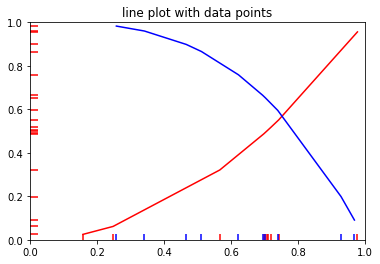

In [15]:
# 绘制事件集示例
from matplotlib.collections import  EventCollection
np.random.seed(19680801)

xdata = np.random.random([2,10])
xdata1 = xdata[0,:]
xdata2 = xdata[1,:]

xdata1.sort()
xdata2.sort()

ydata1 = xdata1**2
ydata2 = 1 - xdata2**3

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(xdata1,ydata1,'r',xdata2,ydata2,'b')

# create the events marking the x data points
xevents1 = EventCollection(xdata1,color=[1,0,0],linelength=0.05)
xevents2 = EventCollection(xdata2,color=[0,0,1],linelength=0.05)

# create the events marking the y data points
yevents1 = EventCollection(ydata1,color=[1,0,0],linelength=0.05,orientation='vertical')
yevents2 = EventCollection(ydata2,color=[1,0,0],linelength=0.05,orientation='vertical')

ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_title('line plot with data points')

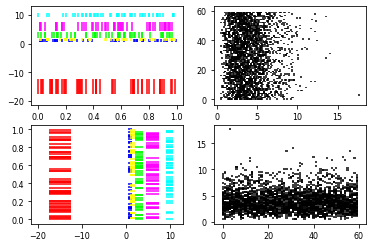

In [19]:
# 绘制plot事件图的示例
# 一个事件图，显示具有各种线属性的事件序列。该图以水平和垂直方向显示。

plt.rcParams['font.size'] = 8.0

np.random.seed(1)

data1 = np.random.random([6,50])

color1 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1],
                   [1,1,0],
                   [1,0,1],
                   [0,1,1]])
lineoffsets1 = np.array([-15,3,1,1.5,6,10])
linelengths1 = np.array([5,2,1,1,3,1.5]) 

fig,axs = plt.subplots(2,2)
axs[0,0].eventplot(data1,color=color1,lineoffsets=lineoffsets1,
                   linelengths=linelengths1)
axs[1,0].eventplot(data1,color=color1,lineoffsets=lineoffsets1,
                   linelengths=linelengths1,orientation='vertical')

# the gamma distribution is only used fo aesthetic purposes
data2 = np.random.gamma(4,size=[60,50])

color2 = [(0,0,0)]
lineoffsets2 = 1
linelengths2 = 1

axs[0,1].eventplot(data2,color=color2,lineoffsets=lineoffsets2,
                   linelengths=linelengths2)
axs[1,1].eventplot(data2,color=color2,lineoffsets=lineoffsets2,
                   linelengths=linelengths2,orientation='vertical')   

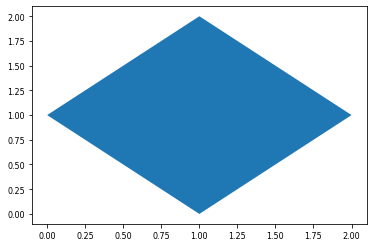

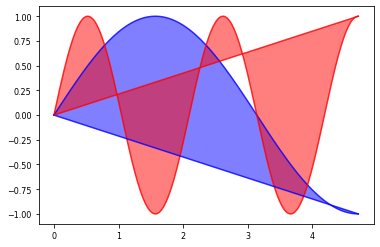

In [29]:
# 绘制填充图示例
x = [0,1,2,1]
y = [1,2,1,0]

fig,ax = plt.subplots()
ax.fill(x,y)

# 接下来，还有一些可选功能：
# 
#     使用单个命令的多条曲线。
#     设置填充颜色。
#     设置不透明度（alpha值）。
x = np.linspace(0,1.5*np.pi,500)
y1 = np.sin(x)
y2 = np.sin(3*x)

fig,ax = plt.subplots()
ax.fill(x,y1,'b',x,y2,'r',alpha=.5)
ax.plot(x,y1,c='b',alpha=.8)
ax.plot(x,y2,c='r',alpha=.8)
ax.plot([x[0],x[-1]],[y1[0],y1[-1]],c='b',alpha=.8)
ax.plot([x[0],x[-1]],[y2[0],y2[-1]],c='r',alpha=.8)

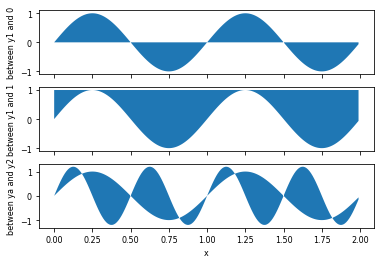

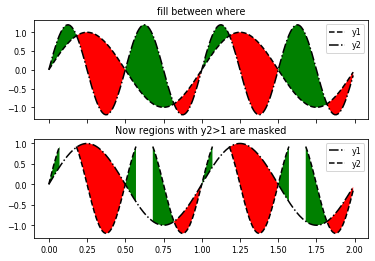

In [52]:
# 填充线条之间的区域(fill_between)
x = np.arange(0,2,0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)

ax1.fill_between(x,y1,0)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x,y1,1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x,y1,y2)
ax3.set_ylabel('between ya and y2')
ax3.set_xlabel('x')

# 满足逻辑条件的填充
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(x,y1,'--',color='black',label='y1')
ax1.plot(x,y2,'-.',color='black',label='y2')
ax1.fill_between(x,y1,y2,where=y2>=y1,facecolor='green',interpolate=True)
ax1.fill_between(x,y1,y2,where=y2<=y1,facecolor='red',interpolate=True)
ax1.set_title('fill between where')
ax1.legend()

y2 = np.ma.masked_greater(y2,1)
ax2.plot(x,y1,'r-.',color='black',label='y1')
ax2.plot(x,y2,'b--',color='black',label='y2')
ax2.fill_between(x,y1,y2,where=y2>=y1,
                 facecolor='green',interpolate=True)
ax2.fill_between(x,y1,y2,where=y2<=y1,
                 facecolor='red',interpolate=True)
ax2.set_title('Now regions with y2>1 are masked')
ax2.legend()

Text(0.5, 1.0, 'Now regions with x2>1 are masked')

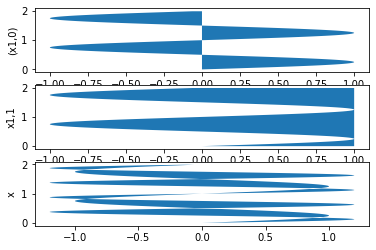

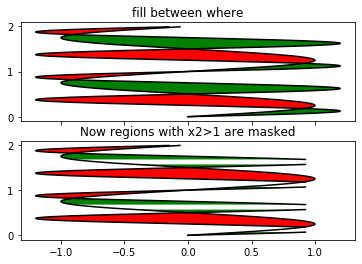

In [7]:
# 使用fill_betweenx在两条水平曲线之间着色。
y = np.arange(0,2,0.01)
x1 = np.sin(2*np.pi*y)
x2 = 1.2*np.sin(4*np.pi*y)

fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharey=True)

ax1.fill_betweenx(y,0,x1)
ax1.set_ylabel('(x1,0)')

ax2.fill_betweenx(y,x1,1)
ax2.set_ylabel(('x1,1'))

ax3.fill_betweenx(y,x1,x2)
ax3.set_ylabel('x')

# now fill between x1 and x2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(y[where], x1[where], x2[where])
# because of edge effects over multiple contiguous regions.
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(x1,y,x2,y,color='black')
ax1.fill_betweenx(y,x1,x2,where=x2>=x1,facecolor='green')
ax1.fill_betweenx(y,x1,x2,where=x2<=x1,facecolor='red')

ax1.set_title('fill between where')

# Test support for masked arrays.
x2 =np.ma.masked_greater(x2,1.0)
ax2.plot(x1,y,x2,y,color='black')
ax2.fill_betweenx(y,x1,x2,where=x2>=x1,facecolor='green')
ax2.fill_betweenx(y,x1,x2,where=x2<=x1,facecolor='red')
ax2.set_title('Now regions with x2>1 are masked')
